# CPSC 303, Winter 2, 2023
# Assignment 2 - Due Friday February 10

Please show all your work. Use a Jupyter notebook with Python 3 kernel for the submission. You can add on to this notebook, uploaded in [https://canvas.ubc.ca/courses/106362/files/folder/Assignments/Assignment2](https://canvas.ubc.ca/courses/106362/files/folder/Assignments/Assignment2), or create your own.   
Before submitting please use 'Kernel/Restart\& Clear Output' from the drop down menu and afterwards run each cell once before submitting to check everything runs correctly. Then export the notebook as a PDF and submit it to Gradescope. Ensure that you properly select the correct pages for each question. Also submit the notebook itself to Canvas. 

*Note 1: Many operations in this assignment are easiest to do using numpy arrays. If you need a tutorial/refresher on their indexing and manipulation, I can recommend [https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html) for a quick summary.*   
*Note 2: If you didn't do some exercise another one relies on as input (e.g. didn't do 1b, but need values for $c$ to do 1c) , you can use a built-in method or solve per hand to get the necessary data to continue.*

### 1. We are given four data points $(-1,1),(0,1),(1,2),(2,3)$ from a function $f(x)$ and want to find an interpolant in Newton form. Instead of using divided differences, we want to construct the interpolating equation system as on Slide 12 of Chapter10 and solve for the coefficients $c$.

**(a)** (3 points) Write the matrix A in Python for the four points provided for the interpolating problem $Ac = y$. Solve for c with <tt>numpy.linalg.solve</tt>. Write down the polynomial interpolant $p(x)$ in Newton form.

In [130]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.array((-1,0,1,2))
ys = np.array((1,1,2,3))

def newton_basis(n, xArr, x):
    result = 1
    for k, xk in enumerate(xArr):
        if (k<n):
            result *= (x - xk)
        else:
            break
    return result
# construct matrix A
# hint: start with zeros and fill it in, A = np.zeros((n,n))
A = np.zeros((ys.size, xs.size))
yVec = np.zeros(ys.size)
for i, _ in enumerate(xs):
    for j, x in enumerate(xs):
        A[j][i] = newton_basis(i, xs, x)

# solve for c
c = np.linalg.solve(A, ys)
#print(f'{c}, {np.dot(A, c)}')

The resulting coefficient vector is [1, 0, 1/2, -1/6]
$p(x) = 1(1) + 0(x+1) + \frac{1}{2}x(x+1) - \frac{1}{6}x(x+1)(x-1) = 1 + \frac{1}{2}x^2 + \frac{1}{2}x - \frac{1}{6}x^3 - \frac{1}{6}x = 1 - \frac{1}{3}x + \frac{1}{2}x^2 - \frac{1}{6}x^3$

The resulting interpolant in Newton form is: $p(x) = 1 + \frac{1}{2}x(x+1) - \frac{1}{6}x(x+1)(x-1)$

The resulting interpolant is: $p(x) = 1 + \frac{1}{3}x + \frac{1}{2}x^2 - \frac{1}{6}x^3$

**(b)** (2 points) We now got two additional points $(3,4), (4,1)$ for the function $f$. Make another matrix $A_2$ reusing the previous matrix $A$ and solve for $c_2$ for a new Newton polynomial $p_2(x)$. Write down the Newton form of $p_2(x)$.

In [131]:
x2 = np.array((-1,0,1,2,3,4))
y2 = np.array((1,1,2,3,4,1))

# construct A2 from A and the additional info
A2 = np.pad(A, [(0, 2), (0, 2)])
for i, _ in enumerate(x2):
    for j, x in enumerate(x2[4:], 4):
        A2[j][i] = newton_basis(i, x2, x)

# solve for c2
c2 = np.linalg.solve(A2, y2)
#print(c2)

The resulting interpolant in Newton form is: $p_2(x) = 1 - 3.55e-16(x+1) + 0.5x(x+1) - \frac{1}{6}(x-1)x(x+1) + \frac{1}{24}(x-2)(x-1)x(x+1) - \frac{1}{24}(x-3)(x-2)(x-1)x(x+1)$

**(c)** (3 points) Define a Newton interpolator function that takes coefficients $c$, abscissae $x$ and evaluation points $x_{eval}$ as input and returns the function values $y$. Plot the data points and both interpolants $p(x)$ and $p_2(x)$ from before in a figure. Use at least 100 evaluation points to get smooth curves. Add a legend to identify $p$ and $p_2$.

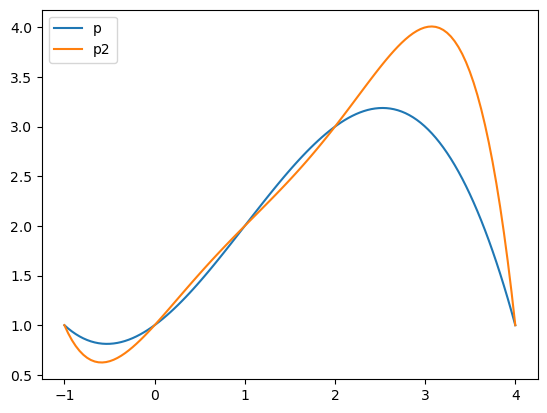

In [132]:
def single_x(c,x,x_eval):
    output = 0
    for i, c in enumerate(c):
        this_loop = c
        for j, this_x in enumerate(x[:i]):
            this_loop *= x_eval - this_x
        output += this_loop
    return output

# c is coeff arr
# x is [-1,0,1,2,3,4]
# x_eval is pts to multiply
def newton(c,x,x_eval):
    ys = [0]*x_eval.size
    for i, xVal in enumerate(x_eval):
        ys[i] = single_x(c,x,xVal)
    return ys
xArr = np.linspace(-1,4,120)
cYs = newton(c,xs,xArr)
c2Ys = newton(c2,x2,xArr)
# make a plot
plt.plot(xArr, cYs)
plt.plot(xArr, c2Ys)
plt.legend(["p", "p2"])
plt.show()

### 2. General framework to use Newton interpolation.

**(a)** (3 points) Write a function that uses divided differences to return the Newton coefficients $c$. You can store the table as a matrix, filling in only the lower triangle.

In [133]:
def divDif(x,y):
    A = np.zeros((x.size, x.size))
    for j, this_y in enumerate(y):
        A[j][0] = this_y
    for i, this_x in enumerate(x[1:], 1):
        for j, this_y in enumerate(y[i:], i):
            A[j][i] = (A[j][i-1] - A[j-1][i-1]) / (x[j] - x[j-i])
    return np.diag(A) # return the coefficients c from the table

**(b)** (2 points) Test your code for the function $f(x) = \ln(x)$. Use the function from (a) to compute $c$ for the abscissae $x=[1,2,3,4]$. Then use the function from exercise 1(c) to evaluate the resulting polynomial $p_3(x)$ on at least 100 points on the interval $[1,4]$. Plot it in a figure and compare it to the built-in log function <tt>np.log(x)</tt> evaluated at the same points and plottet into the same figure.

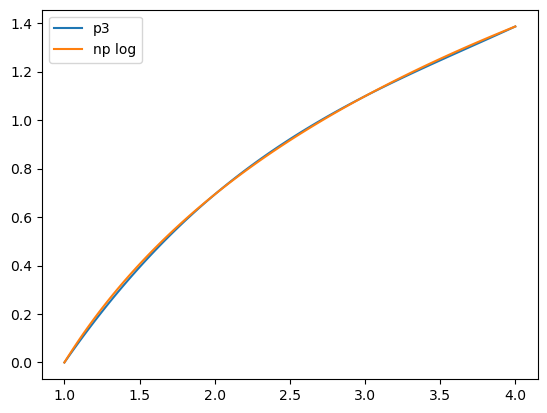

In [134]:
x = np.array((1,2,3,4))
y = np.log(x)

# get c from DivDif
c = divDif(x, y)
#print(c)

# plot ln(x) and the interpolant with newton(c,x,x_eval) on the interval [1,4]
xArr2 = np.linspace(1,4,120)
appx = newton(c, x, xArr2)
true = np.log(xArr2)
plt.plot(xArr2, appx)
plt.plot(xArr2, true)
plt.legend(["p3", "np log"])
plt.show()

**(c)** (3 points) For $n+1$ equidistant points $[x_0,...,x_n]$ on an interval $[a,b]$ it holds that 
\begin{equation*}
max_{s \in [a,b]} \left | \prod_{j=0}^n (s-x_j)\right | \leq \frac{n!}{4}\left (\frac{(b-a)}{n}\right )^{n+1}.
\end{equation*}
Use this and the interpolation error bound formula to find an upper bound for the error
\begin{equation*}
e_3 =\max_{1\leq x \leq 4} | \ln(x) - p_3(x)|.
\end{equation*}
Also plot the error $e_3$ for the approximation in (b) over the interval $[1,4]$ and compare it with your error bound.

$f(x) = lnx, f^{4}(x) = \frac{-6}{x^4}$

$\frac{n!}{4}(\frac{(b-a)}{n})^{n+1} = \frac{3!}{4}(\frac{(4-1)}{3})^{4} = \frac{6}{4}(\frac{3}{3})^{4} = \frac{3}{2} = 1.5$.

$Error \le \frac{1}{(n+1)!}max_{s \in [a,b]} \left | f^{n+1}(s) \right | \frac{3}{2} = \frac{1}{8}max_{s \in [1,4]} \left | f^{4}(s) \right | = \frac{1}{8}max_{s \in [1,4]} \left | \frac{-6}{s^4} \right | = \frac{6}{8} = \frac{3}{4} = 0.75$

max error on the interval: 0.014181173849088569


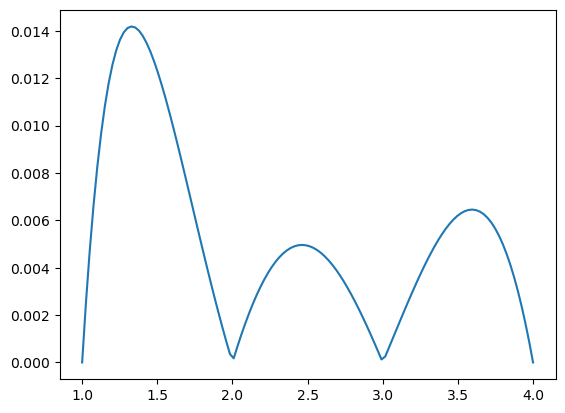

In [135]:
# plot error on the interval [1,4]
print(f'max error on the interval: {np.max(np.abs(appx - true))}')
plt.plot(xArr2, np.abs(appx - true))
plt.show()

The error bound of 0.75 is significantly greater than the actual found max error of 0.0142

**(d)** (2 points) Copy your code from (a) and extend it to work with repeated abscissae with derivative values as well. Assume the input to be sorted, where the derivatives are given in increasing order for each data point, e.g. input $x = [1,1,1,2,2]$, $y = [1,2,3,0.1,0.2]$ would refer to $f(1) = 1$, $f'(1) = 2$, $f''(1) = 3$, $f(2) = 0.1$, $f'(2) = 0.2$.

In [136]:
from math import factorial

def divDifExt(x,y):
    A = np.zeros((x.size, x.size))
    last_x = x[0]
    last_y = y[0]
    for i, this_x in enumerate(x):
        if(last_x == this_x):
            A[i][0] = last_y
        else:
            last_x = this_x
            last_y = y[i]
            A[i][0] = last_y
    for i, this_x in enumerate(x[1:], 1):
        for j, this_y in enumerate(y[i:], i):
            if (x[j] != x[j-i]):
                A[j][i] = (A[j][i-1] - A[j-1][i-1]) / (x[j] - x[j-i])
            else:
                A[j][i] = y[i] / factorial(i)
    return np.diag(A) # return the coefficients c from the table

### 3. Extended divided differences.

**(a)** (2 points) For some function we have the extended divided difference table of the form 

| $$i$$ | $$x_i$$ | $$f[ \cdot ]$$ | $$f[\cdot, \cdot]$$ | $$f[\cdot, \cdot, \cdot]$$ | $$f[\cdot, \cdot, \cdot, \cdot]$$
| :- | :- | :- | :- | :- | :- |
0 | 5.0 | $$f[x_0]$$ | | | 
1 | 5.0 | $$f[x_1]$$ | $$f[x_0,x_1]$$ | |
2 | 6.0 | 4.0 | 5.0 | -3.0 |
3 | 4.0 | 2.0 | $$f[x_2,x_3]$$ | $$f[x_1, x_2,x_3]$$ | $$f[x_0, x_1, x_2,x_3]$$

Fill in the unknown entries of the table:

$$f[x_0] = -1$$
$$f[x_1] = -1$$
$$f[x_0,x_1] = 8$$
$$f[x_2,x_3] = 1$$
$$f[x_1, x_2,x_3] = 4$$
$$f[x_0, x_1, x_2,x_3] = -7$$

$-3 = 5-f[x0,x1]/(6-5) = 5-f[x0,x1] => f[x0,x1] = 5 + 3 = 8$

$5 = (4 - f[x1]) / (6-5) = 4 - f[x1] => f[x1] = 4 - 5 = -1$

$f[x0] = f[x1] = -1$

$f[x2,x3] = (2 - 4) / (4 - 6) = -2/-2 = 1$

$f[x1,x2,x3] = (1 - 5) / (4 - 5) = -4/-1 = 4$

$f[x0,x1,x2,x3] = (4 + 3) / (4 - 5) = 7/-1 = -7$

**(b)** (1 point) What is the osculating polynomial resulting from this table?  



$p(x) = -1 + 8(x-5) -3(x-5)^2 -7 (x-5)^2(x-6)$

**(c)** (3 points) Interpolate $f(x) = ln(x)$ by passing a cubic function through $x_i = (0.1, 1, 2, 2.9)$. Evaluate the interpolant at $x=1.5$ and compare the result against the exact value and against the value of the osculating Hermite cubic through the points $x_i = (1,1,2,2)$. Explain you observation by looking at the error terms for both interpolating cubic polynomials.   
You can either use your codes from above or solve this by hand.

In [137]:
x = np.array((0.1, 1, 2, 2.9))
y = np.log(x)

c = divDifExt(x,y)

# solve for c
#print(c) #-2.30258509 + 2.55842788(1.5-0.1) -0.98172668(1.5-0.1)(0.5) + 0.29792893 (1.5-0.1)(0.5)(1.5-2)
est = single_x(c,x,1.5)
true = np.log(1.5)
print(f'true: {true}, est: {est}, hermite: {0.409074}')
print(f'true - est: {true - est}, true - hermite: {true - 0.409074}')


true: 0.4054651081081644, est: 0.4877301353502616, hermite: 0.409074
true - est: -0.08226502724209722, true - hermite: -0.0036088918918356083


Error expression for the interpolation: $error  \le \frac{1}{(n+1)!}max_{s \in [a,b]} \left | f^{n+1}(s) \right | (1.5 - 0.1)(1.5 - 1)(1.5 - 2)(1.5-2.9) = \frac{1}{24}max_{s \in [1.5]} \left | f^{4}(s) \right | \cdot 0.49 = \frac{0.49 * 6}{24} = \frac{0.49}{4} = 0.1225$


Error expression for the hermite cubic: $\frac{1}{4}(1.5 − 1)^2(1.5 − 2)^2 = .015625$

The error for the interpolated polynomial is significantly greater than that of the hermite polynomial. This can be expected after analysis of the error bounds of the two functions. The interpolation error has a much looser bound than the hermite cubic interpolation, matching it's larger error.